# Adapted Attribute Types

## Now with spawned classes

We already introduced [Adapted-Types.ipynb](Adapted-Types.ipynb). Please execute it first, leaving the `Connection` table defined and populated.

We will now demonstrate using adapted types when working with previously defined schemas. 

Also, see [Spawning-Classes.ipynb](Spawning-Classes.ipynb) for a review of `schema.spawn_missing_classes` and `dj.create_virtual_module`. 

In [1]:
# enable the use of adapted types for this session
import os
os.environ['DJ_SUPPORT_ADAPTED_TYPES'] = "TRUE"  

In [2]:
# Show author, date, and version
import datetime, getpass
print(getpass.getuser(), datetime.datetime.today())

import datajoint as dj
print('DataJoint Version', dj.__version__)

dj.config["enable_python_native_blobs"] = True  # enable Python types in blobs 

dimitri 2019-11-03 22:23:40.371603
DataJoint Version 0.12.1


Let's connect to the schema defined in [Adapted-Types.ipynb](Adapted-Types.ipynb).

In [3]:
schema = dj.schema('test_graphs')

Connecting dimitri@localhost:3306


To work with the `<graph>` type used in that schema we need to define or import the adapter object *before* `spawn_missing_classes`. 

We define the `graph` object the same way we as in [Adapted-Types.ipynb](Adapted-Types.ipynb):

In [4]:
import networkx as nx

class GraphAdapter(dj.AttributeAdapter):
    
    attribute_type = 'longblob'   # this is how the attribute will be declared
    
    def put(self, obj):
        # convert the nx.Graph object  into an edge list
        assert isinstance(obj, nx.Graph)
        return list(obj.edges)

    def get(self, value):
        # convert edge list back into an nx.Graph
        return nx.Graph(value)
    

# instantiate for use as a datajoint type
graph = GraphAdapter()

## Spawning missing classes in the local namespace

Now spawning missing classes will have the type adapter accessible:

In [5]:
schema.spawn_missing_classes()

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt

result = Connectivity.fetch('conn_graph', order_by='conn_id')

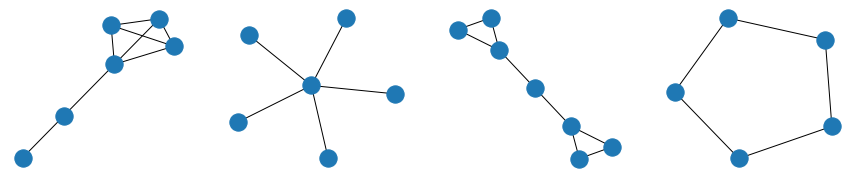

In [8]:
fig, axx = plt.subplots(1, result.size , figsize=(15, 3))
for g, ax in zip(result, axx.flatten()):
    plt.sca(ax)
    nx.draw(g)

## Creating a virtual module with adapted attribute types

To allow adapted attribyte types in virtual modules, they must be passed using the `add_objects` argument:

In [9]:
vmod = dj.create_virtual_module('vmod', 'test_graphs', add_objects={'graph': graph})

In [10]:
result = vmod.Connectivity.fetch('conn_graph', order_by='conn_id')

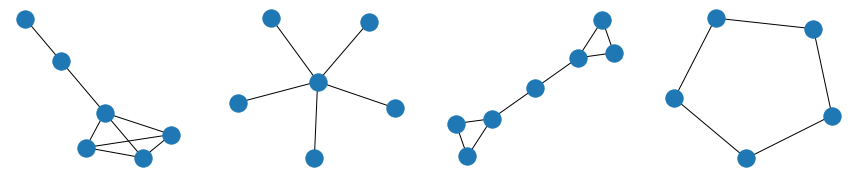

In [12]:
fig, axx = plt.subplots(1, result.size , figsize=(15, 3))
for g, ax in zip(result, axx.flatten()):
    plt.sca(ax)
    nx.draw(g)

That's all!

In practice, the attribute adapter class would be declared in a separate module to be used in all modules that use it.